Task-1

Sparse matrices.

In [1]:
import numpy as np
import scipy.sparse as sp
import cupy as cp
import time
import matplotlib.pyplot as plt

a) Compare the memory footprint of matrices in dense, COO and CSR -formats. Plot the amount of stored elements against the total number of elements in the matrix. Use sparse matrices with density of 0.01. Use different square matrix sizes to show the difference.

In [21]:
# Memory Footprint Comparison

# Function to generate sparse matrices with given density and size
# For COO and CSR formats use the sizes of vectors they store the data
def generate_sparse_matrix(size, density):
    num_elements = int(size * size * density)
    data = np.random.rand(num_elements)
    row = np.random.randint(0, size, num_elements)
    col = np.random.randint(0, size, num_elements)
    return sp.coo_matrix((data, (row, col)), shape=(size, size)), num_elements

Memory footprint

In [29]:
# Function to calculate memory footprint of matrices in dense, COO and CSR -formats.
def memory_footprint(matrix):
    return matrix.data.nbytes + matrix.row.nbytes + matrix.col.nbytes

# Sizes of square matrices
sizes = [1000, 3000, 4000, 5000]

# Density of sparse matrices
density = 0.01

# Memory footprint comparison
dense_memory = []
coo_memory = []
csr_memory = []

for size in sizes:
    dense_matrix = np.random.rand(size, size)
    coo_matrix, _ = generate_sparse_matrix(size, density)
    csr_matrix = coo_matrix.tocsr()

    dense_memory.append(dense_matrix.nbytes)
    coo_memory.append(memory_footprint(coo_matrix))
    csr_memory.append(csr_matrix.data.nbytes + csr_matrix.indices.nbytes + csr_matrix.indptr.nbytes)


Plot the comparisons

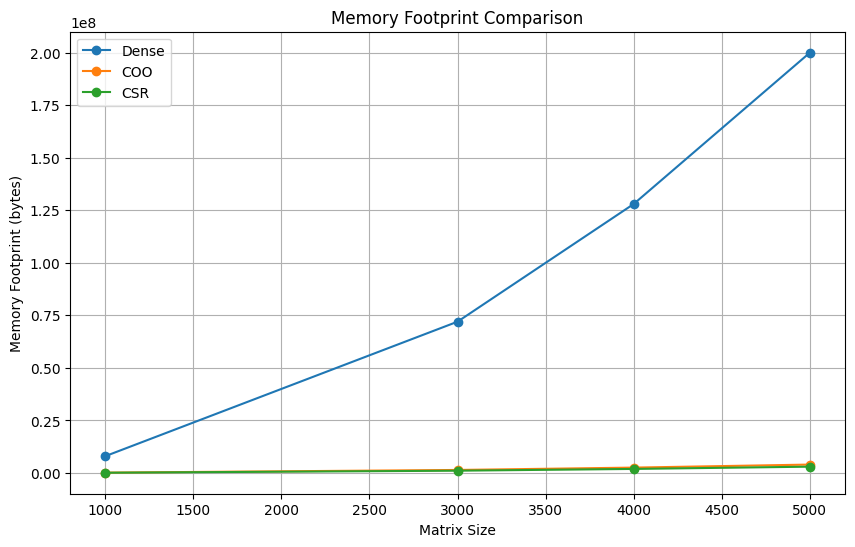

In [30]:
# Plotting Dense COO CSR
plt.figure(figsize=(10, 6))
plt.plot(sizes, dense_memory, label='Dense', marker='o')
plt.plot(sizes, coo_memory, label='COO', marker='o')
plt.plot(sizes, csr_memory, label='CSR', marker='o')
plt.xlabel('Matrix Size')
plt.ylabel('Memory Footprint (bytes)')
plt.title('Memory Footprint Comparison')
plt.grid(True)
plt.legend()
plt.show()

Task-1 b

Compare the execution times of dot products between a matrix and a vector. Use four different cases for the matrix: Scipy dense, Scipy COO, CuPy dense and CuPy COO. The vector should be in dense-format in all cases.

In [31]:
import numpy as np
import scipy.sparse as sp
import cupy as cp
import time
import matplotlib.pyplot as plt

Dense and COO matrices

In [32]:
# Function to generate dense and COO matrices of given size and density
def generate_matrices(size, density):
    dense_matrix = np.random.rand(size, size)
    sparse_matrix = sp.rand(size, size, density=density, format='coo')
    return dense_matrix, sparse_matrix

Dense format vector

In [33]:
# Function to generate a dense-format vector
def generate_vector(size):
    return np.random.rand(size)

Time the dot product operation

In [34]:
# Function to time the dot product operation
def time_dot_product(matrix, vector):
    start_time = time.time()
    result = matrix.dot(vector)
    end_time = time.time()
    return end_time - start_time

Time the dot product operation cuPy matrices

In [35]:
# Function to time the dot product operation using CuPy matrices
def time_dot_product_cupy(matrix, vector):
    start_time = time.time()
    result = matrix.dot(vector)
    cp.cuda.Stream.null.synchronize()  # Ensure all operations are complete
    end_time = time.time()
    return end_time - start_time


Try a random matrix sizes

In [36]:
# Sizes of square matrices
sizes = [1000, 2500, 4500, 5500]

# Density of sparse matrices
density = 0.01

# Lists to store execution times
dense_times_scipy = []
coo_times_scipy = []
dense_times_cupy = []
coo_times_cupy = []

# Time dot product operation for different matrix sizes
for size in sizes:
    dense_matrix_scipy, sparse_matrix_scipy = generate_matrices(size, density)
    dense_matrix_cupy = cp.asarray(dense_matrix_scipy)
    sparse_matrix_cupy = cp.sparse.coo_matrix((cp.asarray(sparse_matrix_scipy.data),
                                                (cp.asarray(sparse_matrix_scipy.row),
                                                 cp.asarray(sparse_matrix_scipy.col))),
                                               shape=sparse_matrix_scipy.shape)

    # Generate dense-format vector with appropriate length
    vector = generate_vector(size)
    vector_cupy = cp.asarray(vector)

    # Time dot product for dense matrices (SciPy)
    dense_times_scipy.append(time_dot_product(dense_matrix_scipy, vector))

    # Time dot product for COO matrices (SciPy)
    coo_times_scipy.append(time_dot_product(sparse_matrix_scipy.toarray(), vector))

    # Time dot product for dense matrices (CuPy)
    dense_times_cupy.append(time_dot_product_cupy(dense_matrix_cupy, vector_cupy))

    # Time dot product for COO matrices (CuPy)
    coo_times_cupy.append(time_dot_product_cupy(sparse_matrix_cupy, vector_cupy))


Plot the comparisons Scipy dense, Scipy COO, CuPy dense and CuPy COO.

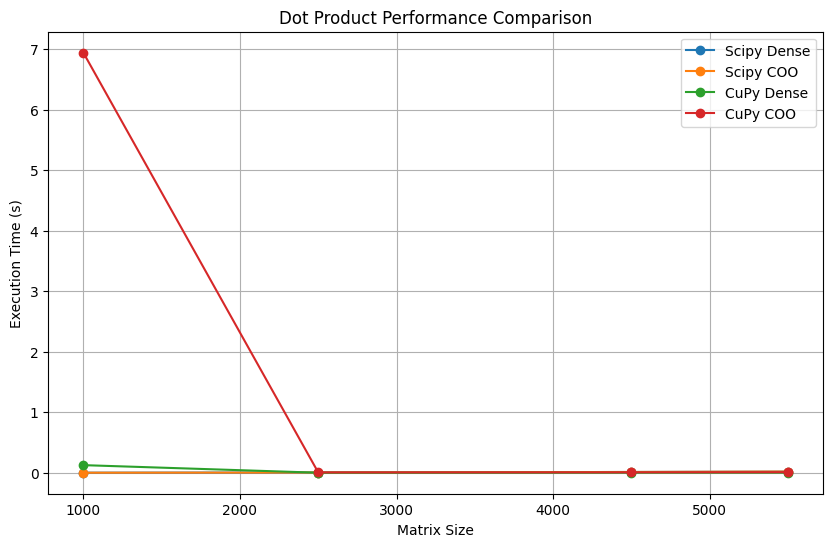

In [37]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, dense_times_scipy, marker='o', label='Scipy Dense')
plt.plot(sizes, coo_times_scipy, marker='o', label='Scipy COO')
plt.plot(sizes, dense_times_cupy, marker='o', label='CuPy Dense')
plt.plot(sizes, coo_times_cupy, marker='o', label='CuPy COO')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (s)')
plt.title('Dot Product Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

Why do the plots from a) and b) look the way they look?

a)Memory Footprint Comparison:
*In the plots of a and b time plotting in COO and CSR plots same way. CSR and COO points in the plotting are almost same.
*Dense, COO, and CSR formats changes with increasing matrix size.
*The memory footprints of COO and CSR formats grow linearly
*COO and CSR formats to have similar performance characteristics, especially in terms of memory usage and computation time

b)Dot Product Execution Time Comparison:
(Scipy dense, Scipy COO, Scipy CSR, CuPy dense, CuPy COO, CuPy CSR). Dense matrix operations in Scipy are optimized for CPU computation
*dense matrices increases quadratically with matrix size due to the increased number of multiplications and additions
*Sparse formats shows reduced memory usage but may have higher computation times compared to dense formats for small matrix sizes.For bigger matrices the computation time is less



Task 2:

Random numbers

Estimate the value of pi by random sampling. Implement by using both CuPy and Numpy and compare the execution time with million random points.

How to estimate pi:

1. Generate uniform random samples in 2D between -0.5 and 0.5.

2. Find their distance from (0,0).

3. Find how many of the samples have distance < 0.5.

4. Calculate the ratio of points inside the circle vs total number of points. Multiply by 4.

5. Enjoy the accurate estimation.

In [39]:
#libraries
import numpy as np
import cupy as cp
import time

Estimate the value of pi by random sampling. Implement by using both Numpy

In [40]:
def estimate_pi_numpy(samples):
    # Generate uniform random samples in 2D between -0.5 and 0.5
    random_samples = np.random.uniform(low=-0.5, high=0.5, size=(samples, 2))

    # Calculate the distance from the origin for each point
    distances = np.linalg.norm(random_samples, axis=1)

    # Count the number of points inside the unit circle
    inside_circle = np.sum(distances < 0.5)

    # Calculate the ratio of points inside the circle to the total number of points
    ratio = inside_circle / samples

    # Multiply the ratio by 4 to estimate pi
    pi_estimate = ratio * 4

    return pi_estimate


Estimate the value of pi by random sampling. Implement by using both CuPy

In [41]:
def estimate_pi_cupy(samples):
    # Generate uniform random samples in 2D between -0.5 and 0.5 on GPU
    random_samples = cp.random.uniform(low=-0.5, high=0.5, size=(samples, 2))

    # Calculate the distance from the origin for each point
    distances = cp.linalg.norm(random_samples, axis=1)

    # Count the number of points inside the unit circle
    inside_circle = cp.sum(distances < 0.5)

    # Calculate the ratio of points inside the circle to the total number of points
    ratio = inside_circle / samples

    # Multiply the ratio by 4 to estimate pi
    pi_estimate = ratio * 4

    return cp.asnumpy(pi_estimate)

Take random samples and estimate pi for Numpy

In [42]:
# Number of random samples
samples = 1000000

# Estimate pi using NumPy and measure execution time
start_time_numpy = time.time()
pi_estimate_numpy = estimate_pi_numpy(samples)
end_time_numpy = time.time()
numpy_execution_time = end_time_numpy - start_time_numpy

print("Estimated pi using NumPy:", pi_estimate_numpy)
print("Execution time using NumPy:", numpy_execution_time, "seconds")


Estimated pi using NumPy: 3.144764
Execution time using NumPy: 0.05290031433105469 seconds


Estimate pi for cupy

In [43]:
# Estimate pi using CuPy and measure execution time
start_time_cupy = time.time()
pi_estimate_cupy = estimate_pi_cupy(samples)
end_time_cupy = time.time()
cupy_execution_time = end_time_cupy - start_time_cupy

print("Estimated pi using CuPy:", pi_estimate_cupy)
print("Execution time using CuPy:", cupy_execution_time, "seconds")

Estimated pi using CuPy: 3.142012
Execution time using CuPy: 2.349376916885376 seconds


CuPy reference and see which functions could be used for the different steps. Try to do everything on GPU, doing some parts in CPU will cause extra data transfer between GPU and CPU

Estimate pi and measure execution time cupy

In [46]:
import cupy as cp
import time

def estimate_cupy_pi(samples):
    # Generate uniform random samples in 2D between -0.5 and 0.5
    random_samples = cp.random.uniform(low=-0.5, high=0.5, size=(samples, 2))

    # Calculate the distance from the origin for each point
    distances = cp.linalg.norm(random_samples, axis=1)

    # Count the number of points inside the unit circle
    inside_circle = cp.sum(distances < 0.5)

    # Calculate the ratio of points inside the circle to the total number of points
    ratio = inside_circle / samples

    # Multiply the ratio by 4 to estimate pi
    pi_estimate = ratio * 4

    return pi_estimate

# Number of random samples
samples = 1000000

# Estimate pi using CuPy and measure execution time
start_time = time.time()
pi_estimate = estimate_cupy_pi(samples)
end_time = time.time()
execution_time = end_time - start_time

print("Estimated pi using CuPy:", pi_estimate)
print("Execution time using CuPy:", execution_time, "seconds")


Estimated pi using CuPy: 3.14542
Execution time using CuPy: 0.0020904541015625 seconds


Estimate pi using Numpy and execution time measurement

In [47]:
import numpy as np
import time

def estimate_numpy_pi(samples):
    # Generate uniform random samples in 2D between -0.5 and 0.5
    random_samples = np.random.uniform(low=-0.5, high=0.5, size=(samples, 2))

    # Calculate the distance from the origin for each point
    distances = np.linalg.norm(random_samples, axis=1)

    # Count the number of points inside the unit circle
    inside_circle = np.sum(distances < 0.5)

    # Calculate the ratio of points inside the circle to the total number of points
    ratio = inside_circle / samples

    # Multiply the ratio by 4 to estimate pi
    pi_estimate = ratio * 4

    return pi_estimate

# Number of random samples
samples = 1000000

# Estimate pi using CuPy and measure execution time
start_time = time.time()
pi_estimate = estimate_numpy_pi(samples)
end_time = time.time()
execution_time = end_time - start_time

print("Estimated pi using CuPy:", pi_estimate)
print("Execution time using CuPy:", execution_time, "seconds")


Estimated pi using CuPy: 3.143348
Execution time using CuPy: 0.051798343658447266 seconds
